In [ ]:
import astropy.units as u
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord, SkyOffsetFrame

fits_dir = "~/moving_universe/assets/jwst_gc_ref_table.fits"
catalog = Table.read(fits_dir)

with fits.open(fits_dir) as hdul:
    hdr = hdul[1].header
    ra0  = hdr["RA_0"]  * u.deg
    dec0 = hdr["DEC_0"] * u.deg

In [ ]:
origin = SkyCoord(ra0, dec0, frame="icrs")

# The "x" and "y" position of the star, relative to RA_0 and DEC_0 
# units are arcsecs projected onto the sky (i.e., ra*cos(dec) for the x-coordinate)
xoff = catalog["x"] * u.arcsec
yoff = catalog["y"] * u.arcsec

In [26]:
from get_jwst_wcs_correction import get_jwst_wcs_correction 

# real wcs offsets
# catalog from .../2022_08_10_dl20250618/...
dx_as, dy_as = get_jwst_wcs_correction("2022_08_10_dl20250618")
dx = dx_as * u.arcsec
dy = dy_as * u.arcsec

# add correction 
xoff_corr = xoff + dx
yoff_corr = yoff + dy

sky_corr = SkyCoord(xoff_corr, yoff_corr, frame=SkyOffsetFrame(origin=origin)).icrs

catalog["RA_ICRS_deg"]  = sky_corr.ra.deg
catalog["DEC_ICRS_deg"] = sky_corr.dec.deg

ra  = catalog["RA_ICRS_deg"] 
dec = catalog["DEC_ICRS_deg"] 

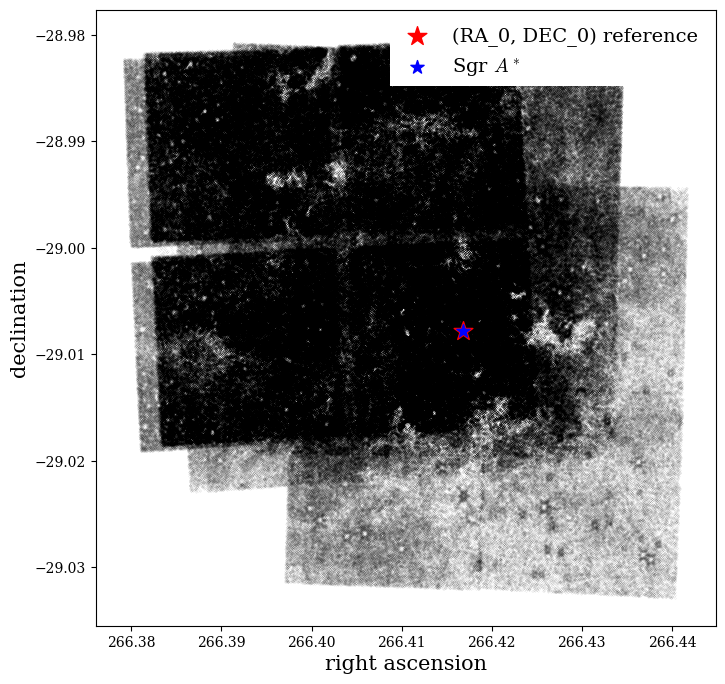

In [45]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif" 
plt.rcParams["mathtext.fontset"] = "cm" 

# sgr A coordinates 
(RA_A, DE_A) = (266.4168, -29.0078)

fig, axis = plt.subplots(1, 1, figsize=(8, 8)) 
plt.scatter(ra, dec, color='k', s=0.001) 
plt.scatter(ra0, dec0, color='red', marker='*', s=200, label="(RA_0, DEC_0) reference") 
plt.scatter(RA_A, DE_A, color='blue', marker='*', s=100, label=r"Sgr $A^*$")

plt.xlabel("right ascension", fontsize=15) 
plt.ylabel("declination", fontsize=15) 
leg = plt.legend(
    frameon=True,
    facecolor="white",
    edgecolor="none",   
    framealpha=1.0,     
    fancybox=False, 
    loc="upper right", 
    fontsize=14,
)
plt.savefig("/Users/vinland/moving_universe/output/analysis/sagA_location.png", dpi=300)
plt.show()